In [1]:
import pandas as pd
import requests
import json
import matplotlib
%matplotlib inline

In [2]:
base_url = "https://exoplanetarchive.ipac.caltech.edu/cgi-bin/nstedAPI/nph-nstedAPI?"
table_exo = "table=exoplanets"
col_exo = "select=pl_name,pl_eqt"
format_exo = "format=json"
sep = "&"

In [3]:
exo_req = base_url + table_exo + sep + col_exo + sep + format_exo
exo_req

'https://exoplanetarchive.ipac.caltech.edu/cgi-bin/nstedAPI/nph-nstedAPI?table=exoplanets&select=pl_name,pl_eqt&format=json'

In [4]:
exo_pl_eqt = requests.get(exo_req).json()

In [5]:
df = pd.DataFrame(exo_pl_eqt)

In [6]:
df

,pl_name,pl_eqt
0,CoRoT-11 b,1657.0
1,CoRoT-12 b,1442.0
2,CoRoT-13 b,1700.0
3,CoRoT-14 b,1952.0
4,CoRoT-16 b,NaN
...,...,...
4139,HATS-42 b,1856.0
4140,OGLE-2017-BLG-1522L b,NaN
4141,GJ 1132 c,300.0
4142,HAT-P-11 c,NaN


In [7]:
nasa_info = pd.read_csv("../data/nasa/exoplanet_nasa.csv")

In [8]:
nasa_info.head()

,pl_hostname,pl_letter,pl_name,pl_discmethod,pl_controvflag,pl_pnum,pl_orbper,pl_orbpererr1,pl_orbpererr2,pl_orbperlim,...,st_masslim,st_massn,st_rad,st_raderr1,st_raderr2,st_radlim,st_radn,pl_nnotes,rowupdate,pl_facility
0,CoRoT-11,b,CoRoT-11 b,Transit,0,1,2.994330,0.000011,-0.000011,0.0,...,0.0,5,1.37,0.03,-0.03,0.0,6,0,2014-05-14,CoRoT
1,CoRoT-12,b,CoRoT-12 b,Transit,0,1,2.828042,0.000013,-0.000013,0.0,...,0.0,5,1.12,0.10,-0.09,0.0,6,0,2014-05-14,CoRoT
2,CoRoT-13,b,CoRoT-13 b,Transit,0,1,4.035190,0.000030,-0.000030,0.0,...,0.0,3,1.01,0.03,-0.03,0.0,4,0,2014-05-14,CoRoT
3,CoRoT-14,b,CoRoT-14 b,Transit,0,1,1.512140,0.000130,-0.000130,0.0,...,0.0,3,1.21,0.08,-0.08,0.0,4,0,2014-05-14,CoRoT
4,CoRoT-16,b,CoRoT-16 b,Transit,0,1,5.352270,0.000200,-0.000200,0.0,...,0.0,2,1.19,0.14,-0.13,0.0,3,0,2014-05-14,CoRoT


In [9]:
nasa_info = nasa_info.assign(pl_eqt = df['pl_eqt'])

In [10]:
nasa_info.shape

(4144, 83)

In [11]:
nasa_info.to_csv('../data/nasa/exoplanet_nasa_eqt.csv', index=False)

In [ ]:
# Folloing is just for further understanding of the data concerning the question of star mass in correlation with
# the orbit period of the planet. --> Same star mass and orbit period = same conditions for earth:

In [12]:
nasa_info = nasa_info[nasa_info["pl_orbper"]<400]

In [13]:
nasa_info = nasa_info[nasa_info["st_mass"]<1.1]

In [14]:
nasa_info = nasa_info[nasa_info["st_mass"]>0.9]

In [15]:
nasa_info = nasa_info[nasa_info["pl_orbper"]>330]

In [16]:
nasa_info[["pl_name", "pl_orbper", "st_mass", "pl_eqt", "st_dist"]]

,pl_name,pl_orbper,st_mass,pl_eqt,st_dist
160,HD 28185 b,379.000000,1.02,NaN,39.43
384,HD 142415 b,386.299990,1.07,NaN,35.57
2641,Kepler-452 b,384.843000,1.04,265.0,560.62
2709,Kepler-1634 b,374.876239,0.92,NaN,654.00
3468,HD 148284 b,339.331000,1.07,NaN,121.61


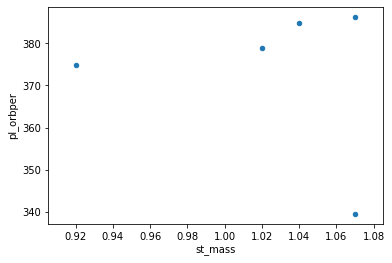

In [17]:
nasa_info.plot.scatter("st_mass", "pl_orbper")